In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
def load_all_results(results_dir='results/population'):
    results = []
    for filename in os.listdir(results_dir):
        if filename.startswith('history_experiment_') and filename.endswith('.json'):
            filepath = os.path.join(results_dir, filename)
            with open(filepath, 'r') as f:
                history = json.load(f)
            results.append(history)
    return results


In [3]:
def process_results(results):
    best_fitness_list = []
    history_list = []
    
    for result in results:
        # Extrair informações de melhor fitness
        best_fitness_list.append({
            'experiment_id': result['experiment_id'],
            'repetition': result['repetition'],
            'best_train_v_measure': result['best_train_v_measure'],
            'best_test_v_measure': result['best_test_v_measure'],
            'best_individual': result['best_individual'],
            "count_better": result['count_better'],
            "count_worse": result['count_worse'],
            'config': result['config']
        })
        
        # Criar uma tupla ordenada da configuração excluindo 'experiment_id' e 'repetition'
        config_items = [(k, v) for k, v in result['config'].items() if k not in ['repetition']]
        config_tuple = tuple(sorted(config_items))
        
        # Adicionar ao histórico com identificação
        for generation_data in result['history']:
            history_record = generation_data.copy()
            history_record['experiment_id'] = result['experiment_id']
            history_record['repetition'] = result['repetition']
            history_record['config'] = result['config']
            history_record['count_better'] = result['count_better']
            history_record['count_worse'] = result['count_worse']
            history_list.append(history_record)
    
    # Criar DataFrames
    df_best_fitness = pd.DataFrame(best_fitness_list)
    df_history = pd.DataFrame(history_list)
    
    return df_best_fitness, df_history


# Population Results

In [ ]:
# Carregar todos os resultados
results = load_all_results('results/population')

# Processar os resultados
df_best_fitness, df_history = process_results(results)
df_best_fitness

,experiment_id,repetition,best_train_v_measure,best_test_v_measure,best_individual,count_better,count_worse,config
0,10,0,0.231627,0.231360,operators['+'](operators['-'](operators['-'](x...,2097,2379,"{'population_size': 100, 'num_generations': 50..."
1,10,1,0.168380,0.068765,"operators['*'](x4, operators['-'](operators['+...",2295,2203,"{'population_size': 100, 'num_generations': 50..."
2,10,2,0.186164,0.125625,operators['-'](operators['-'](operators['*'](x...,2385,2137,"{'population_size': 100, 'num_generations': 50..."
3,10,3,0.220083,0.231360,operators['+'](operators['*'](operators['-'](x...,2246,2222,"{'population_size': 100, 'num_generations': 50..."
4,10,4,0.129158,0.046018,operators['-'](operators['+'](operators['/'](x...,3010,1482,"{'population_size': 100, 'num_generations': 50..."
...,...,...,...,...,...,...,...,...
140,9,5,0.169859,0.097258,"operators['/'](operators['+'](x4, operators['*...",1216,1458,"{'population_size': 100, 'num_generations': 30..."
141,9,6,0.119149,0.125625,"operators['+'](operators['/'](x8, operators['/...",1522,1176,"{'population_size': 100, 'num_generations': 30..."
142,9,7,0.163896,0.175273,"operators['-'](operators['-'](x1, operators['+...",1208,1512,"{'population_size': 100, 'num_generations': 30..."
143,9,8,0.193089,0.068765,"operators['-'](operators['*'](x1, operators['+...",1313,1403,"{'population_size': 100, 'num_generations': 30..."


In [49]:
df_best_fitness['population_size'] = df_best_fitness['config'].apply(lambda x: x['population_size'])
df_best_fitness['num_generations'] = df_best_fitness['config'].apply(lambda x: x['num_generations'])

df_grouped = df_best_fitness.groupby(['population_size', 'num_generations']).agg({'best_train_v_measure': 'max', 'best_test_v_measure': 'max'}).reset_index()

pivot_table = df_grouped.pivot(index='population_size', columns='num_generations', values='best_train_v_measure')

# Sort the index and columns for better readability
pivot_table = pivot_table.sort_index().sort_index(axis=1)
display(pivot_table.style.background_gradient(cmap='viridis', axis=None))

num_generations,30,50,100,250
population_size,,,,
30,0.141522,0.193089,0.226938,0.243327
50,0.174326,0.225478,0.220083,0.313123
100,0.193089,0.231627,0.267293,0.305011
250,0.210022,0.254459,0.367849,nan


In [50]:
pivot_table = df_grouped.pivot(index='population_size', columns='num_generations', values='best_test_v_measure')

# Sort the index and columns for better readability
pivot_table = pivot_table.sort_index().sort_index(axis=1)
display(pivot_table.style.background_gradient(cmap='viridis', axis=None))

num_generations,30,50,100,250
population_size,,,,
30,0.142740,0.371056,0.230885,0.407224
50,0.285742,0.231360,0.197700,0.343711
100,0.178710,0.407224,0.285742,0.142740
250,0.231360,0.285742,0.464229,nan


In [51]:
df_history['population_size'] = df_history['config'].apply(lambda x: x.get('population_size'))
df_history['num_generations'] = df_history['config'].apply(lambda x: x.get('num_generations'))

df_grouped = df_history.groupby(['population_size', 'num_generations']).agg({'best_fitness': 'mean', 'test_fitness': 'mean'}).reset_index()
df_grouped
pivot_table = df_grouped.pivot(index='population_size', columns='num_generations', values='best_fitness')

# Sort the index and columns for better readability
pivot_table = pivot_table.sort_index().sort_index(axis=1)
display(pivot_table.style.background_gradient(cmap='viridis', axis=None))

num_generations,30,50,100,250
population_size,,,,
30,0.102894,0.124519,0.142721,0.158789
50,0.114299,0.143930,0.152934,0.179560
100,0.127846,0.144885,0.171322,0.196385
250,0.148467,0.165004,0.213153,nan


### Best Config

In [ ]:
best_experiment = df_best_fitness.loc[df_best_fitness['best_test_v_measure'].idxmax()]['experiment_id']
best_experiment

np.int64(15)

In [94]:
df_best = df_history.loc[df_history['experiment_id'] == best_experiment]
best_repetition = df_best.loc[df_best['best_fitness'].idxmax()]['repetition']

df_best = df_best.loc[df_best['repetition'] == best_repetition]
df_best

,generation,best_fitness,min_fitness,average_fitness,std_fitness,test_fitness,experiment_id,repetition,config,count_better,count_worse
3900,0,0.102402,0.000000e+00,0.013006,0.016987,0.230885,15,1,"{'population_size': 250, 'num_generations': 10...",12294,10166
3901,1,0.102402,6.232449e-16,0.016091,0.017530,0.230885,15,1,"{'population_size': 250, 'num_generations': 10...",12294,10166
3902,2,0.102402,3.143036e-06,0.017964,0.017121,0.230885,15,1,"{'population_size': 250, 'num_generations': 10...",12294,10166
3903,3,0.102402,1.113149e-05,0.019212,0.019348,0.230885,15,1,"{'population_size': 250, 'num_generations': 10...",12294,10166
3904,4,0.107806,1.204030e-05,0.020271,0.019708,0.085152,15,1,"{'population_size': 250, 'num_generations': 10...",12294,10166
...,...,...,...,...,...,...,...,...,...,...,...
3995,95,0.367849,2.538349e-05,0.188693,0.111765,0.068765,15,1,"{'population_size': 250, 'num_generations': 10...",12294,10166
3996,96,0.367849,2.380950e-05,0.179793,0.117316,0.068765,15,1,"{'population_size': 250, 'num_generations': 10...",12294,10166
3997,97,0.367849,6.232449e-16,0.192070,0.112681,0.068765,15,1,"{'population_size': 250, 'num_generations': 10...",12294,10166
3998,98,0.367849,5.514778e-06,0.194523,0.113993,0.068765,15,1,"{'population_size': 250, 'num_generations': 10...",12294,10166


In [95]:
### best experiment metrics

df_metrics = pd.DataFrame(columns=['best_fitness', 'min_fitness', 'average_fitness', 'std_fitness', 'best_test_fitness', 'min_test_fitness', 'average_test_fitness', 'std_test_fitness', 'count_better', 'count_worse'])

df_metrics.loc[0] = [df_best['best_fitness'].max(), df_best['min_fitness'].min(), df_best['average_fitness'].mean(), df_best['std_fitness'].mean(), df_best['test_fitness'].max(), df_best['test_fitness'].min(), df_best['test_fitness'].mean(), df_best['test_fitness'].std(), df_best['count_better'].max(), df_best['count_worse'].max()]
df_metrics = df_metrics.T.rename(columns={0: 'value'})
df_metrics

,value
best_fitness,0.367849
min_fitness,0.000000
average_fitness,0.100386
std_fitness,0.065207
best_test_fitness,0.464229
min_test_fitness,0.005063
average_test_fitness,0.126636
std_test_fitness,0.141490
count_better,12294.000000
count_worse,10166.000000


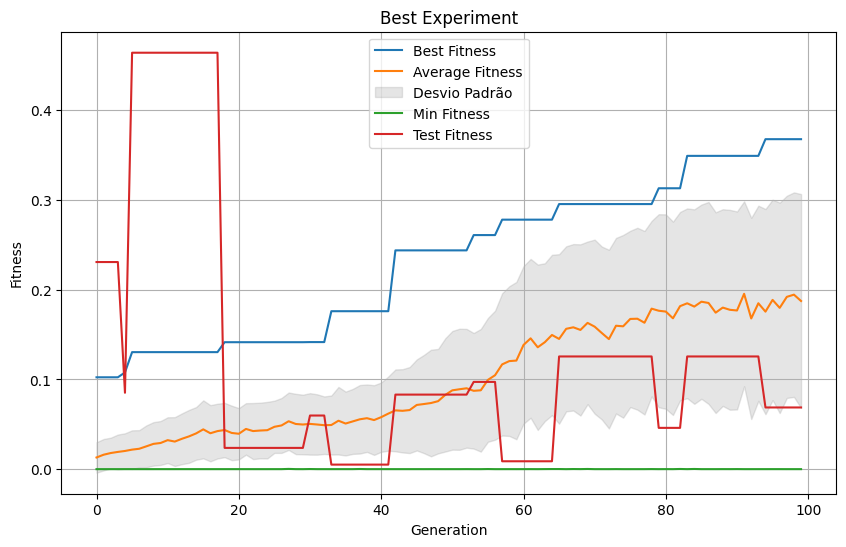

In [97]:
## plot best experiment
plt.figure(figsize=(10, 6))
# Plotar o Best Fitness
plt.plot(df_best['generation'], df_best['best_fitness'], label='Best Fitness')

# Plotar o Average Fitness
plt.plot(df_best['generation'], df_best['average_fitness'], label='Average Fitness')

# Preencher a área do desvio padrão em torno da média
plt.fill_between(
    df_best['generation'],
    df_best['average_fitness'] - df_best['std_fitness'],
    df_best['average_fitness'] + df_best['std_fitness'],
    color='gray',
    alpha=0.2,
    label='Desvio Padrão'
)

# Plotar o Min Fitness
plt.plot(df_best['generation'], df_best['min_fitness'], label='Min Fitness')

# Plotar o Test Fitness
plt.plot(df_best['generation'], df_best['test_fitness'], label='Test Fitness')

# Configurações do gráfico
plt.xlabel('Generation')  
plt.ylabel('Fitness')
plt.title('Best Experiment')
plt.legend()
plt.grid(True)
plt.show()

# Operators Probability

In [5]:
# Carregar todos os resultados
results = load_all_results('results/operators')

# Processar os resultados
df_best_fitness, df_history = process_results(results)
df_best_fitness

,experiment_id,repetition,best_train_v_measure,best_test_v_measure,best_individual,count_better,count_worse,config
0,1,0,0.197376,0.230885,operators['-'](operators['*'](operators['+'](o...,12159,10473,"{'population_size': 250, 'num_generations': 10..."
1,1,1,0.117670,0.125625,operators['/'](operators['+'](operators['+'](o...,16736,5806,"{'population_size': 250, 'num_generations': 10..."
2,1,2,0.175013,0.068765,"operators['-'](operators['*'](x3, operators['*...",13248,9204,"{'population_size': 250, 'num_generations': 10..."
3,1,3,0.253607,0.126359,operators['*'](operators['+'](operators['*'](x...,11268,11206,"{'population_size': 250, 'num_generations': 10..."
4,1,4,0.296173,0.068765,operators['+'](operators['*'](operators['+'](o...,12577,9787,"{'population_size': 250, 'num_generations': 10..."
5,1,5,0.267293,0.178710,"operators['*'](operators['-'](x3, operators['*...",11007,11465,"{'population_size': 250, 'num_generations': 10..."
6,1,6,0.177455,0.142740,operators['*'](operators['/'](operators['/'](o...,12997,9397,"{'population_size': 250, 'num_generations': 10..."
7,1,7,0.193089,0.197700,operators['+'](operators['/'](operators['-'](x...,12949,9593,"{'population_size': 250, 'num_generations': 10..."
8,1,8,0.278749,0.068765,operators['-'](operators['-'](operators['*'](o...,11858,10602,"{'population_size': 250, 'num_generations': 10..."
9,1,9,0.148177,0.230885,"operators['/'](operators['+'](x1, operators['+...",14386,8192,"{'population_size': 250, 'num_generations': 10..."


In [7]:
df_best_fitness['config'][0]

{'population_size': 250,
 'num_generations': 100,
 'crossover_prob': 0.9,
 'mutation_prob': 0.05,
 'tournament_size': 2,
 'experiment_id': 1,
 'repetition': 0}

In [24]:
df_best_fitness['crossover_prob'] = df_best_fitness['config'].apply(lambda x: x['crossover_prob'])
df_best_fitness['mutation_prob'] = df_best_fitness['config'].apply(lambda x: x['mutation_prob'])

df_grouped = df_best_fitness.groupby(['crossover_prob', 'mutation_prob']).agg({'best_train_v_measure': 'max', 'best_test_v_measure': 'max'}).reset_index()

pivot_table = df_grouped.pivot(index='crossover_prob', columns='mutation_prob', values='best_train_v_measure')

# Sort the index and columns for better readability
pivot_table = pivot_table.sort_index().sort_index(axis=1)
display(pivot_table.style.background_gradient(cmap='viridis', axis=None))

mutation_prob,0.050000,0.300000
crossover_prob,,
0.600000,nan,0.379333
0.900000,0.296173,nan


In [20]:
df_grouped = df_best_fitness.groupby(['crossover_prob', 'mutation_prob']).agg({'count_better': 'max', 'count_worse': 'max'}).reset_index()

df_grouped['percentage_better'] = df_grouped['count_better'] / (df_grouped['count_better'] + df_grouped['count_worse']) * 100
df_grouped['percentage_worse'] = df_grouped['count_worse'] / (df_grouped['count_better'] + df_grouped['count_worse']) * 100

df_grouped['percentage_better'] = df_grouped['percentage_better'].round(2).astype(str) + '%'
df_grouped['percentage_worse'] = df_grouped['percentage_worse'].round(2).astype(str) + '%'

df_grouped

,crossover_prob,mutation_prob,count_better,count_worse,percentage_better,percentage_worse
0,0.6,0.30,11700,6730,63.48%,36.52%
1,0.9,0.05,16736,11465,59.35%,40.65%


In [22]:
best_experiment = df_best_fitness.loc[df_best_fitness['best_test_v_measure'].idxmax()]['experiment_id']
best_experiment

np.int64(2)

In [23]:
df_best = df_history.loc[df_history['experiment_id'] == best_experiment]
best_repetition = df_best.loc[df_best['best_fitness'].idxmax()]['repetition']

df_best = df_best.loc[df_best['repetition'] == best_repetition]
df_best

,generation,best_fitness,min_fitness,average_fitness,std_fitness,test_fitness,experiment_id,repetition,config,count_better,count_worse
1400,0,0.081845,0.000000e+00,0.012847,0.016714,0.068765,2,4,"{'population_size': 250, 'num_generations': 10...",8254,6700
1401,1,0.083698,6.232449e-16,0.015294,0.018389,0.006497,2,4,"{'population_size': 250, 'num_generations': 10...",8254,6700
1402,2,0.097880,3.143036e-06,0.018449,0.018725,0.068765,2,4,"{'population_size': 250, 'num_generations': 10...",8254,6700
1403,3,0.097880,1.113149e-05,0.021304,0.021704,0.068765,2,4,"{'population_size': 250, 'num_generations': 10...",8254,6700
1404,4,0.145124,1.204030e-05,0.022712,0.022762,0.178710,2,4,"{'population_size': 250, 'num_generations': 10...",8254,6700
...,...,...,...,...,...,...,...,...,...,...,...
1495,95,0.379333,2.380950e-05,0.167155,0.109459,0.020131,2,4,"{'population_size': 250, 'num_generations': 10...",8254,6700
1496,96,0.379333,3.143036e-06,0.171900,0.104349,0.020131,2,4,"{'population_size': 250, 'num_generations': 10...",8254,6700
1497,97,0.379333,1.113149e-05,0.169693,0.108460,0.020131,2,4,"{'population_size': 250, 'num_generations': 10...",8254,6700
1498,98,0.379333,5.514778e-06,0.180635,0.109196,0.020131,2,4,"{'population_size': 250, 'num_generations': 10...",8254,6700


In [26]:
### best experiment metrics

df_metrics = pd.DataFrame(columns=['best_fitness', 'min_fitness', 'average_fitness', 'std_fitness', 'best_test_fitness', 'min_test_fitness', 'average_test_fitness', 'std_test_fitness', 'count_better', 'count_worse'])

df_metrics.loc[0] = [df_best['best_fitness'].max(), df_best['min_fitness'].min(), df_best['average_fitness'].mean(), df_best['std_fitness'].mean(), df_best['test_fitness'].max(), df_best['test_fitness'].min(), df_best['test_fitness'].mean(), df_best['test_fitness'].std(), df_best['count_better'].max(), df_best['count_worse'].max()]
df_metrics = df_metrics.T.rename(columns={0: 'value'})
df_metrics.round(2)

,value
best_fitness,0.38
min_fitness,0.00
average_fitness,0.09
std_fitness,0.06
best_test_fitness,0.29
min_test_fitness,0.00
average_test_fitness,0.19
std_test_fitness,0.12
count_better,8254.00
count_worse,6700.00


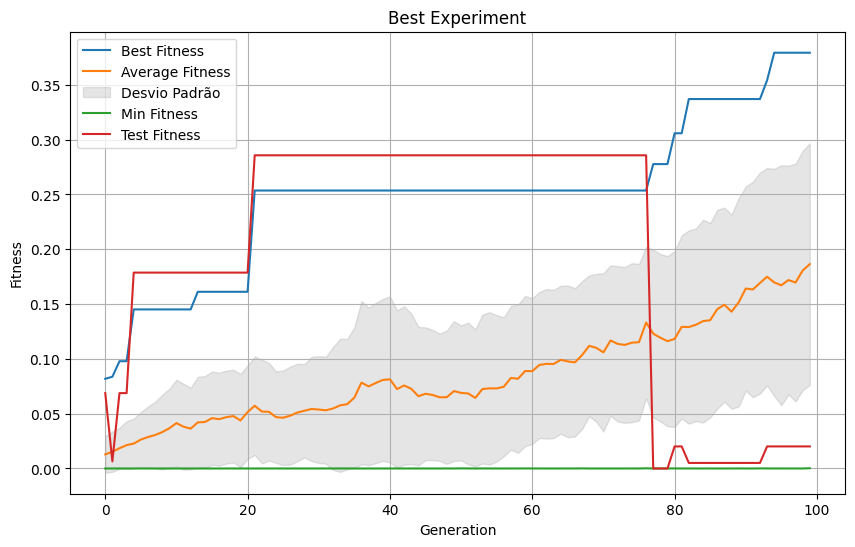

In [27]:
## plot best experiment
plt.figure(figsize=(10, 6))
# Plotar o Best Fitness
plt.plot(df_best['generation'], df_best['best_fitness'], label='Best Fitness')

# Plotar o Average Fitness
plt.plot(df_best['generation'], df_best['average_fitness'], label='Average Fitness')

# Preencher a área do desvio padrão em torno da média
plt.fill_between(
    df_best['generation'],
    df_best['average_fitness'] - df_best['std_fitness'],
    df_best['average_fitness'] + df_best['std_fitness'],
    color='gray',
    alpha=0.2,
    label='Desvio Padrão'
)

# Plotar o Min Fitness
plt.plot(df_best['generation'], df_best['min_fitness'], label='Min Fitness')

# Plotar o Test Fitness
plt.plot(df_best['generation'], df_best['test_fitness'], label='Test Fitness')

# Configurações do gráfico
plt.xlabel('Generation')  
plt.ylabel('Fitness')
plt.title('Best Experiment')
plt.legend()
plt.grid(True)
plt.show()